<a href="https://colab.research.google.com/github/ThrimannaA/AcademicData_Multi_Class_Classification_model/blob/main/AcademicData_Multi_Layer_Perceptron_(MLP)_for_Multi_Class_Classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
#import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

#Data Preparation

In [137]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
#import the tabular dataset from google drive
filename = '/content/drive/MyDrive/MLOM_Practical Assignment_1/academic_dataset.csv'
dataset = open(filename, 'r', encoding='utf-8').read()

In [139]:
# Check if paths exist
import os
print("dataset exists:", os.path.exists(dataset))

dataset exists: False


In [140]:
#Load the tabular dataset
dataset = pd.read_csv('/content/drive/MyDrive/MLOM_Practical Assignment_1/academic_dataset.csv')

In [141]:
#Display first few rows of the dataset to check whether dataset is available now
dataset.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [142]:
#preprocess the data set

#handling missing values-Check whether have missing values
dataset.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [143]:
#Display unique labels for each column
for column in dataset.columns:
    unique_labels = dataset[column].unique()
    print(f"Unique labels in '{column}': {unique_labels}")

Unique labels in 'gender': ['M' 'F']
Unique labels in 'NationalITy': ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
Unique labels in 'PlaceofBirth': ['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
Unique labels in 'StageID': ['lowerlevel' 'MiddleSchool' 'HighSchool']
Unique labels in 'GradeID': ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
Unique labels in 'SectionID': ['A' 'B' 'C']
Unique labels in 'Topic': ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
Unique labels in 'Semester': ['F' 'S']
Unique labels in 'Relation': ['Father' 'Mum']
Unique labels in 'raisedhands': [ 15  20  10  30  40  42  35  50  12  70  19   5  62  36  55  69  60   2
   0   8  25  75   4  45  14  33   7  13  29  39  49  16  28  27  21  80
  17  65  22  11   1   3 

In [144]:
# Display unique labels as counts for each column
for column in dataset.columns:
     print(f"Unique labels and counts in '{column}':\n{dataset[column].value_counts()}\n")

Unique labels and counts in 'gender':
gender
M    305
F    175
Name: count, dtype: int64

Unique labels and counts in 'NationalITy':
NationalITy
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64

Unique labels and counts in 'PlaceofBirth':
PlaceofBirth
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64

Unique labels and counts in 'StageID':
StageID
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: count, dtype: int64

Unique labels and counts in 'GradeID':
GradeID
G-02    147
G-08    116
G-07   

In [145]:
#Encoding Categorical Variables(converting categorical data into a numerical format)

from sklearn.preprocessing import LabelEncoder

#first seperate dataset into X and Y axis as features and label
X = dataset.drop('Class', axis=1)
y = dataset['Class']


# Applying LabelEncoder to all above categorical feature coloumns convertion(This converts each categorical feature into a set of binary (0/1) columns)
le = LabelEncoder()
# List of categorical features want to covert to numerical
categorical_features = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']
for column in categorical_features:
  if column in X.columns:
    X[column] = le.fit_transform(X[column])

# Apply LabelEncoder to the target variable 'Class'
y = le.fit_transform(y)
# Assign the encoded values back to the dataset
dataset['Class'] = y

In [146]:
# Check the shape of the DataFrame
print("Shape of the  X dataset after encoding:", X.shape)
print("Shape of the dataset after encoding:", dataset.shape)

Shape of the  X dataset after encoding: (480, 16)
Shape of the dataset after encoding: (480, 17)


In [147]:
#check whether that transformations have been applied correctly or not-by checking the data types and first few rows

# About X features-->after encoding all X coloumns gives as 'X'
print(type(X))
print("Data types of X columns after encoding:\n", X.dtypes)
print(X[:5])
print('\n\n\n')

# About whole dataset
print(type(dataset))
print("Data types of all columns after encoding:\n", dataset.dtypes)
print(dataset[:20])

<class 'pandas.core.frame.DataFrame'>
Data types of X columns after encoding:
 gender                      int64
NationalITy                 int64
PlaceofBirth                int64
StageID                     int64
GradeID                     int64
SectionID                   int64
Topic                       int64
Semester                    int64
Relation                    int64
raisedhands                 int64
VisITedResources            int64
AnnouncementsView           int64
Discussion                  int64
ParentAnsweringSurvey       int64
ParentschoolSatisfaction    int64
StudentAbsenceDays          int64
dtype: object
   gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
0       1            4             4        2        1          0      7   
1       1            4             4        2        1          0      7   
2       1            4             4        2        1          0      7   
3       1            4             4        2        1     

In [148]:
#Scaling only for Numerical Features[only for coloumns of X]
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler with with_mean=False(option to avoid centering)
scaler = StandardScaler(with_mean=False)

# Apply scaling
X_scaled = scaler.fit_transform(X)

In [149]:
#checking whether that scaling has been applied by:-

# 1)by checking the Shape of X_scaled
print(X_scaled.shape)
print(type(X_scaled))
print(X_scaled[:5])
print("\n\n\n")

# 2)by computing mean and standard deviation of each feature
X_dense = X_scaled.toarray() if hasattr(X_scaled, 'toarray') else X_scaled #want to convert to dense array if it's a sparse matrix
# Compute mean and standard deviation
means = np.mean(X_dense, axis=0)
std_devs = np.std(X_dense, axis=0)

print("Means of features:\n", means)
print("Standard deviations of features:\n", std_devs)

(480, 16)
<class 'numpy.ndarray'>
[[2.07764955 1.62160543 1.52346459 3.31618583 0.40622354 0.
  2.06803458 0.         0.         0.48785019 0.48418046 0.07523461
  0.72440328 2.01581052 2.04866471 2.04303418]
 [2.07764955 1.62160543 1.52346459 3.31618583 0.40622354 0.
  2.06803458 0.         0.         0.65046691 0.60522557 0.11285192
  0.9055041  2.01581052 2.04866471 2.04303418]
 [2.07764955 1.62160543 1.52346459 3.31618583 0.40622354 0.
  2.06803458 0.         0.         0.32523346 0.21182895 0.
  1.08660492 0.         0.         0.        ]
 [2.07764955 1.62160543 1.52346459 3.31618583 0.40622354 0.
  2.06803458 0.         0.         0.97570037 0.75653196 0.18808653
  1.26770574 0.         0.         0.        ]
 [2.07764955 1.62160543 1.52346459 3.31618583 0.40622354 0.
  2.06803458 0.         0.         1.30093383 1.51306393 0.45140767
  1.8110082  0.         0.         0.        ]]




Means of features:
 [1.32017315 1.76180673 1.67501757 2.23151671 1.18058717 0.77302608
 1.5528

In [150]:
#Split the dataset into training and validation sets

from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42) #Assuming as 80%-training , 20%-testing

In [151]:
#Inspect the newly divided dataset after splitting into training and validation sets
print("Shape of whole dataset:", dataset.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of whole dataset: (480, 17)
Shape of X_train: (384, 16)
Shape of X_val: (96, 16)
Shape of y_train: (384,)
Shape of y_val: (96,)


#Model Design

In [152]:
#define the model

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.2))  # Dropout to prevent overfitting
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))  # Dropout to prevent overfitting
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))  # Dropout to prevent overfitting
model.add(layers.Dense(3, activation='softmax'))  # 3 classes (H, M, L) for output layer

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Training

In [153]:
#implement early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

#Train the model
history = model.fit(X_train, y_train, epochs=100,batch_size=32,validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
12/12 [==============================] - 1s 23ms/step - loss: 1.1759 - accuracy: 0.3958 - val_loss: 1.0143 - val_accuracy: 0.4479
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 1.0734 - accuracy: 0.3854 - val_loss: 0.9699 - val_accuracy: 0.4271
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.9763 - accuracy: 0.5130 - val_loss: 0.8856 - val_accuracy: 0.5833
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.9204 - accuracy: 0.5156 - val_loss: 0.8241 - val_accuracy: 0.6250
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.8471 - accuracy: 0.5833 - val_loss: 0.7630 - val_accuracy: 0.6146
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7999 - accuracy: 0.6094 - val_loss: 0.7198 - val_accuracy: 0.6250
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7726 - accuracy: 0.6302 - val_loss: 0.6571 - val_accuracy: 0.7188
Epoch 8/100


In [154]:
model.summary()

Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_340 (Dense)           (None, 128)               2176      
                                                                 
 dropout_255 (Dropout)       (None, 128)               0         
                                                                 
 dense_341 (Dense)           (None, 64)                8256      
                                                                 
 dropout_256 (Dropout)       (None, 64)                0         
                                                                 
 dense_342 (Dense)           (None, 32)                2080      
                                                                 
 dropout_257 (Dropout)       (None, 32)                0         
                                                                 
 dense_343 (Dense)           (None, 3)               

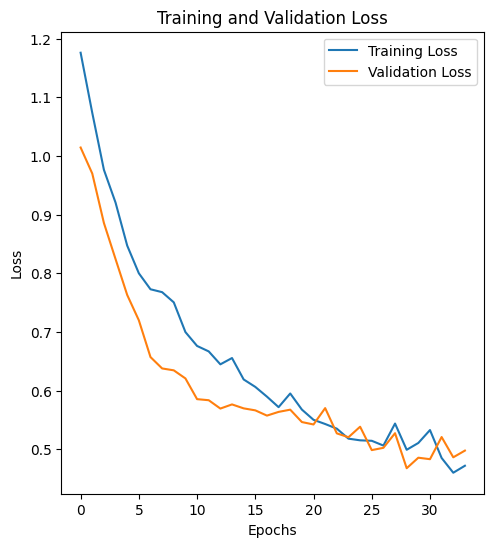

In [155]:
import matplotlib.pyplot as plt

# Plotting Loss
plt.figure(figsize=(12, 6))

#plotting Training loss and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

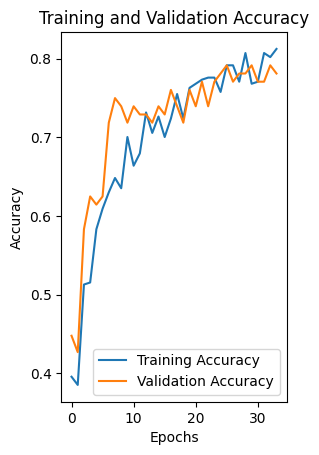

In [156]:
#plotting Training accuracy and Validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Evaluation

In [157]:
# Evaluate the model on the validation set using evaluate() method

val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy* 100:.2f}%")#calculate accuracy as percentage value

3/3 [==============================] - 0s 6ms/step - loss: 0.4676 - accuracy: 0.7812
Validation Loss: 0.46760281920433044
Validation Accuracy: 78.12%


In [158]:
#print accuracy, loss, precision, recall, F1-score
from sklearn.metrics import classification_report

# Predict classes for evaluation
y_pred = model.predict(X_val)
y_pred_classes = y_pred.argmax(axis=1)

# print classification report
report = classification_report(y_val, y_pred_classes, target_names=['Class_H', 'Class_M', 'Class_L'])
print(report)

3/3 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

     Class_H       0.68      0.68      0.68        22
     Class_M       0.81      0.96      0.88        26
     Class_L       0.81      0.73      0.77        48

    accuracy                           0.78        96
   macro avg       0.77      0.79      0.78        96
weighted avg       0.78      0.78      0.78        96



#Hyperparameter Tuning

In [159]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_model(learning_rate=0.01, dropout_rate=0.2):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(3, activation='softmax'))  # 3 classes (H, M, L)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [161]:
import numpy as np
from sklearn.metrics import accuracy_score

# Define hyperparameter grid to specify the hyperparameters to be tested
param_grid = {
    'batch_size': [16, 32, 64],
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.2, 0.3, 0.4]
}

# Initialize variables to keep the best results
best_score = 0
best_params = {}

# Iterate over each hyperparameter combination of of batch_size, learning_rate, and dropout_rate specified in param_grid
for batch_size in param_grid['batch_size']:
    for learning_rate in param_grid['learning_rate']:
        for dropout_rate in param_grid['dropout_rate']:
            print(f"Testing with batch_size={batch_size}, learning_rate={learning_rate}, dropout_rate={dropout_rate}")

            #Create and train the model
            model = create_model(learning_rate=learning_rate, dropout_rate=dropout_rate)
            history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size,
                                validation_data=(X_val, y_val), verbose=0)

            #Evaluate the model
            val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

            print(f"Validation Accuracy: {val_accuracy}")

            # Update the best parameters, if the current model’s validation accuracy is higher than the previously recorded best_score
            if val_accuracy > best_score:
                best_score = val_accuracy
                best_params = {
                    'batch_size': batch_size,
                    'learning_rate': learning_rate,
                    'dropout_rate': dropout_rate
                }
print('\n')
#print those best Parameters and Score
print("Best Parameters:")
print(best_params)
#Display best validation accuracy as percentage
print("Best Validation Accuracy: {:.2f}%".format(best_score * 100))

Testing with batch_size=16, learning_rate=0.001, dropout_rate=0.2
Validation Accuracy: 0.7916666865348816
Testing with batch_size=16, learning_rate=0.001, dropout_rate=0.3
Validation Accuracy: 0.78125
Testing with batch_size=16, learning_rate=0.001, dropout_rate=0.4
Validation Accuracy: 0.8541666865348816
Testing with batch_size=16, learning_rate=0.01, dropout_rate=0.2
Validation Accuracy: 0.84375
Testing with batch_size=16, learning_rate=0.01, dropout_rate=0.3
Validation Accuracy: 0.8125
Testing with batch_size=16, learning_rate=0.01, dropout_rate=0.4
Validation Accuracy: 0.7604166865348816
Testing with batch_size=16, learning_rate=0.1, dropout_rate=0.2
Validation Accuracy: 0.6770833134651184
Testing with batch_size=16, learning_rate=0.1, dropout_rate=0.3
Validation Accuracy: 0.5
Testing with batch_size=16, learning_rate=0.1, dropout_rate=0.4
Validation Accuracy: 0.5
Testing with batch_size=32, learning_rate=0.001, dropout_rate=0.2
Validation Accuracy: 0.7916666865348816
Testing with 